# Dashboard Analytique - Restaurant

## Objectif
Analyser les performances du restaurant avec visualisations graphiques.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Données des plats 
plats_data = {
    'id': [1, 2, 3, 4, 5],
    'nom': ['Poulet DG', 'Poisson Braisé', 'Ndolé', 'Poulet Rôti', 'Sauce Gombo'],
    'categorie': ['viande', 'poisson', 'legumes', 'viande', 'legumes'],
    'prix': [3500, 4000, 3000, 3200, 2500]
}

commandes_data = {
    'id_commande': ['CMD001', 'CMD001', 'CMD002', 'CMD003', 'CMD003', 'CMD004'],
    'id_plat': [1, 3, 2, 1, 4, 5],
    'quantite': [2, 1, 1, 1, 2, 1],
    'date': ['2024-11-10', '2024-11-10', '2024-11-10', '2024-11-11', '2024-11-11', '2024-11-11']
}

plats_df = pd.DataFrame(plats_data)
commandes_df = pd.DataFrame(commandes_data)


print(f"Nombre de plats : {len(plats_df)}")
print(f"Nombre de commandes : {len(commandes_df)}")

Nombre de plats : 5
Nombre de commandes : 6


In [8]:
print(" ANALYSE DES PERFORMANCES")
print("=" * 30)

# Fusionner données
commandes_avec_prix = commandes_df.merge(plats_df, left_on='id_plat', right_on='id')
commandes_avec_prix['revenu'] = commandes_avec_prix['quantite'] * commandes_avec_prix['prix']

# Calculs
ca_total = commandes_avec_prix['revenu'].sum()
ca_par_plat = commandes_avec_prix.groupby('nom')['revenu'].sum()
plats_populaires = commandes_avec_prix.groupby('nom')['quantite'].sum()

print(f" Chiffre d'affaires total : {ca_total:,} FCFA")
print(f" Total des commandes : {len(commandes_df)}")
print(f" Nombre de plats différents : {len(plats_df)}")

 ANALYSE DES PERFORMANCES
 Chiffre d'affaires total : 26,400 FCFA
 Total des commandes : 6
 Nombre de plats différents : 5


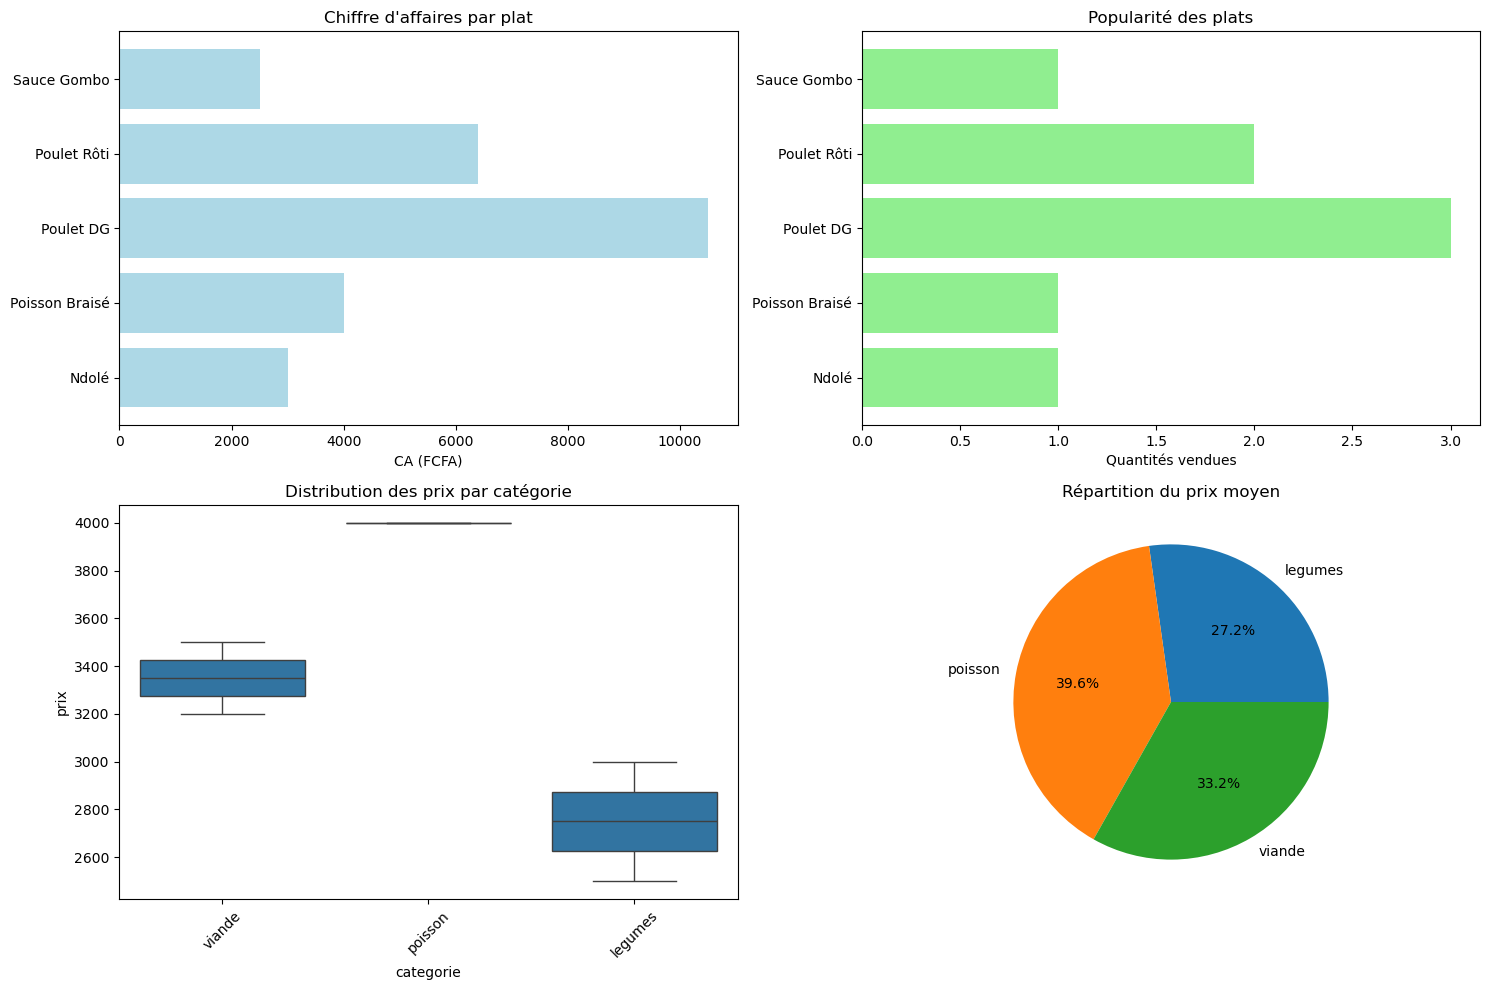

In [9]:
#visualisation
# graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#  CA par plat
axes[0,0].barh(list(ca_par_plat.index), list(ca_par_plat.values), color='lightblue')
axes[0,0].set_title('Chiffre d\'affaires par plat')
axes[0,0].set_xlabel('CA (FCFA)')

#  popularité
axes[0,1].barh(list(plats_populaires.index), list(plats_populaires.values), color='lightgreen')
axes[0,1].set_title('Popularité des plats')
axes[0,1].set_xlabel('Quantités vendues')

#  prix par catégorie
sns.boxplot(data=plats_df, x='categorie', y='prix', ax=axes[1,0])
axes[1,0].set_title('Distribution des prix par catégorie')
axes[1,0].tick_params(axis='x', rotation=45)

#  prix moyens
prix_moyens = plats_df.groupby('categorie')['prix'].mean()
axes[1,1].pie(prix_moyens.values, labels=prix_moyens.index, autopct='%1.1f%%')
axes[1,1].set_title('Répartition du prix moyen')

plt.tight_layout()
plt.show()

In [10]:
print(" RAPPORT SYNTHÈSE")
print("=" * 20)

print(f"\n TOP 3 PLATS PLUS RENTABLES:")
for i, (plat, ca) in enumerate(ca_par_plat.nlargest(3).items(), 1):
    print(f"   {i}. {plat} : {ca:,} FCFA")

print(f"\n PLATS LES PLUS POPULAIRES:")
for i, (plat, qte) in enumerate(plats_populaires.nlargest(3).items(), 1):
    print(f"   {i}. {plat} : {qte} commandes")

print(f"\n STATISTIQUES :")
print(f"    Prix moyen : {plats_df['prix'].mean():.0f} FCFA")
print(f"    Prix min : {plats_df['prix'].min():.0f} FCFA")
print(f"    Prix max : {plats_df['prix'].max():.0f} FCFA")

 RAPPORT SYNTHÈSE

 TOP 3 PLATS PLUS RENTABLES:
   1. Poulet DG : 10,500 FCFA
   2. Poulet Rôti : 6,400 FCFA
   3. Poisson Braisé : 4,000 FCFA

 PLATS LES PLUS POPULAIRES:
   1. Poulet DG : 3 commandes
   2. Poulet Rôti : 2 commandes
   3. Ndolé : 1 commandes

 STATISTIQUES :
   • Prix moyen : 3240 FCFA
   • Prix min : 2500 FCFA
   • Prix max : 4000 FCFA
